## Import

In [1]:
from functools import reduce
from math import sqrt
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
import scipy as sp

## 함수 리스트

In [4]:
#(c)
def standardization(x, mean, std) : 
    return (x-mean)/std

def get_tot_diff_with_mean(x) : 
    mean_x = get_mean(x)
    return sum(map(lambda x : (x - mean_x) ** 2, x))

def get_mean(x) : 
    return (reduce(lambda value_x1, value_x2 : value_x1 + value_x2, x))/len(x)

def get_var(x) : 
    return get_tot_diff_with_mean(x)/len(x)

def get_std(x) : 
    return sqrt(get_tot_diff_with_mean(x)/(len(x) - 1))

def get_cov(x, y) : 
    mean_x = get_mean(x)
    mean_y = get_mean(y)
    sum_of_diff = sum(map(lambda value_x, value_y: (value_x-mean_x)*(value_y-mean_y), x, y))
    return sum_of_diff / (len(x) - 1)

def get_cor(x, y) : 
    return get_cov(x, y) / (get_std(x) * get_std(y))

def get_SSE(y, y_hat) :
    return sum(map(lambda value_y, value_y_hat : (value_y-value_y_hat) ** 2, y, y_hat)) / (len(y) - 2)

def get_slope(x, y) : 
    mean_x = get_mean(x)
    mean_y = get_mean(y)
    return sum(map(lambda value_x, value_y : (value_x - mean_x) * (value_y - mean_y), x, y)) / get_tot_diff_with_mean(x)

def get_intercept(x, y) : 
    return get_mean(y) - (get_slope(x, y) * get_mean(x))

def get_SST(y) : 
    return get_tot_diff_with_mean(y)

def get_R_sqr(y, y_hat) : 
    return 1 - (get_SSE(y, y_hat)/get_SST(y))

def get_std_err_of_intercept(y, y_hat, x) : 
    mean_x = get_mean(x)
    var = get_SSE(y, y_hat)
    std_err_of_intercept = sqrt(var) * sqrt((1/len(x)) + (mean_x ** 2 / get_tot_diff_with_mean(x)))    
    return std_err_of_intercept

def get_std_err_of_slope(y, y_hat, x) : 
    std_err_of_slope = sqrt(get_SSE(y, y_hat)) / sqrt(get_tot_diff_with_mean(x))
    return std_err_of_slope

def get_y_hat(slope, intercept, x) : 
    y_hat = [intercept + slope * x for x in x]
    return y_hat

In [79]:
def get_predicted_value(slope, intercept, given_x) : 
    predicted_value = intercept + slope * given_x
    return predicted_value

In [60]:
def get_std_err_of_predicted_value(SSE, x, given_x) : 
    mean_x = get_mean(x)
    std_err_of_predicted_value = SSE * sqrt(1 + (1/len(x)) + (((given_x - mean_x) ** 2) / get_tot_diff_with_mean(x)))
    return std_err_of_predicted_value

In [95]:
def get_confidence_interval_of_predicted_values(predicted_value, std_err_of_predicted_value, x, alpha=0.95) : 
    confidence_interval = sp.stats.t.interval(alpha=0.95, df=len(x)-2)
    print(std_err_of_predicted_value)
    print(predicted_value)
    print(confidence_interval)
    return (predicted_value + (std_err_of_predicted_value * confidence_interval[0]), predicted_value + (std_err_of_predicted_value * confidence_interval[1]))

## Chapter 2 문제

### 2.1

- (a)Var(x)와 Var(y)를 계산하여라
- (b)$sum_{i=1}^n (y_i - \bar{y}) = 0$ 임을 보여라
- (c)표준화 된 변수들은 평균 0과 표준편차 1을 가짐을 보여라
- (d)식 (2.5), (2.6), (2.7)의 세가지 공식들이 동일함을 보여라
- (e) 식 (2.14)와 (2.20)의 두 공식들이 동일함을 보여라

In [7]:
x = [1, 2, 3, 4, 4, 5, 6, 6, 7, 8, 9, 9, 10, 10]
y = [23, 29, 49, 64, 74, 87, 96, 97, 109, 119, 149, 145, 154, 166]

In [8]:
#(a)
get_var(x), get_var(y)

(8.142857142857142, 1983.4540816326532)

In [9]:
#(b)

In [10]:
# 표준화 된 x의 모음
standardized_x = []
for x_i in x : 
    standardized_x.append(standardization(x_i, mean=get_mean(x), std=get_std(x)))

In [11]:
# 표준화 된 y의 모음
standardized_y = []
for y_i in y : 
    standardized_y.append(standardization(y_i, get_mean(y), get_std(y)))

In [12]:
print(get_mean(standardized_x))
print(get_std(standardized_x))

3.172065784643304e-17
1.0


In [13]:
print(get_mean(standardized_y))
print(get_std(standardized_y))

7.930164461608261e-17
1.0


#### 2.2 다음 진술들에 대하여 동의하는지 혹은 그렇지 않은지를 그 이유와 함께 설명하시오.

(a) Cov(Y, X)와 Cor(Y, X)는 $-\infty$ 와 $\infty$ 사이의 값을 가질 수 있다.  
-> 그럴 것 같다

(b) Cov(Y, X) = 0 또는 Cor(Y,X) = 0 이면, Y와 X사이에 아무런 관계가 없다고 결론 지을 수 있다  
-> 상관 관계만 0이고 인과 관계는 또 모르는 일임

(c) Y대 $\hat{Y}$ 의 산점도에 있는 점들에 적합된 최소제곱회귀선은 절편항 0과 기울기 1을 가진다.  
-> 안 그럴 것 같은데...?

#### 2.3 표 2.9에 있는 회귀 분석 결과를 이용하여 다음 가설들에 대한 검정을 수행하여라($\alpha$ = 0.1)
| variables | coefficient | s.e.  | t-test | p-value |
|-----------|-------------|-------|--------|---------|
| const.    | 4.162       | 3.355 | 1.24   | 0.2385  |
| Units     | 15.509      | 0.505 | 30.71  | <0.0001 |

(a) $H_0 : B_1 = 15$ 대 $H_1 : B_1 \ne 15$

In [14]:
# s.e.(B^_1) = 0.505
(15.509-15)/0.505

1.0079207920792086

자유도 12를 따르는 t 분포의 유의 수준 = 0.1 기준으로 양측 검정 시, 이 귀무가설의 임계값은 1.782 이므로 귀무가설을 기각할 수 없다.  

(b) $H_0 : B_1 = 15$ 대 $H_1 : B_1 > 15$

위 결과를 이용,  자유도 12의 t 분포에서 유의 수준 0.1에 해당하는 t 값은 1.356이므로 귀무가설을 기각할 수 없다.

(c) $H_0 : B_0 = 0$ 대 $H_1 : B_0 \ne 15$

In [15]:
4.162/3.355

1.2405365126676602

1.24 < 1.782 이므로 기각할 수 없다

(c) $H_0 : B_0 = 5$ 대 $H_1 : B_0 \ne 5$

In [16]:
(4.162-5)/3.355

-0.2497764530551416

-0.24 > -1.356 이므로 기각할 수 없다.

#### 2.3 표2.9에 있는 회귀분석 결과를 이용하여 $B_0$에 대한 99% 신뢰구간을 구축하여라

In [17]:
(4.162 - (3.055 * 3.355), 4.162 + (3.055 * 3.355))

(-6.087525, 14.411525000000001)

#### 최소 제곱법을 이용하여 단순선형회귀모형 $Y = B_0 + B_1 X + \epsilon$ 을 데이터에 적합할 때, 다음의 각 진술들이 사실임을 증명할 수 있다.   각 진술들을 수리적으로 증명하거나, 옳음을 수치적으로 보여라(표 2.5의 데이터를 이용하여)

#### 표 2.5의 데이터와 표 2.7의 적합값 및 잔차를 이용하여 다음을 보여라.

(a) $Cor(Y, X) = Cor(Y, \hat{Y}) = 0.994$

In [18]:
y_hat = [19.67, 35.18, 50.69, 66.20, 66.20, 81.71, 97.21, 97.21, 112.72, 128.23, 143.74, 143.74, 159.25, 159.25]

In [19]:
get_cor(y, y_hat)

0.9937010506867261

(b) SST = 22768.348  
SST = $\sum_{i=1}^n(y_i - \bar{y})^2$

In [20]:
# SST
get_tot_diff_with_mean(y)

27768.357142857145

(c)SSE = 348.848  
SSE = $\sum_{i=1}^n(y_i - \hat{y_i})^2$

In [21]:
get_SSE(y, y_hat)

29.060099999999967

#### 2.7 표 2.4에 있는 네 개의 데이터들은 다음 통계량들에 대하여 동일한 값을 준다는 것을 보여라

In [22]:
x_1 = [10, 8, 13, 9, 11, 14,6, 4,12, 7,5,]
y_1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68, ]

In [23]:
x_2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y_2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]

In [24]:
x_3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5, ]
y_3= [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73,]

In [25]:
x_4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8, ]
y_4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89, ]

In [26]:
get_slope(x_1, y_1), get_slope(x_2, y_2), get_slope(x_3, y_3), get_slope(x_4, y_4)

(0.5000909090909091, 0.5, 0.49972727272727274, 0.49990909090909086)

In [27]:
get_intercept(x_1, y_1), get_intercept(x_2, y_2), get_intercept(x_3, y_3), get_intercept(x_4, y_4)

(3.0000909090909103, 3.000909090909091, 3.0024545454545466, 3.0017272727272726)

In [28]:
get_cor(x_1, y_1), get_cor(x_2, y_2), get_cor(x_3, y_3), get_cor(x_4, y_4)

(0.8164205163448399,
 0.8162365060002429,
 0.8162867394895982,
 0.8165214368885029)

In [29]:
get_R_sqr(x_1, y_1), get_R_sqr(x_2, y_2), get_R_sqr(x_3, y_3), get_R_sqr(x_4, y_4)

(0.9333609090909091,
 0.9333370707070707,
 0.9332967676767677,
 0.9333611111111111)

#### 2.8 최소제곱법을 이용하여 단순선형회귀모형 $Y = B_0 + B_1X + \epsilon$ 을 데이터에 적합할 때, $H_0 : B_1 = 0$가 기각되지 않는다고 가정하자. 이것은 모형을 $Y = B_0 + \epsilon$ 과 같이 단순하게 쓸수 있음을 의미한다. $B_0$의 최소제곱추정치는 $\hat{B_0} = \bar{y}$ 이다(이를 증명할 수 있는가?)

In [30]:
# 아이패드 풀이 참고

#### 2.9 아이패드 풀이 참고


In [31]:
0.2885 ** 2

0.08323225

In [32]:
#(b)
0.656 * 0.45 + 0.2

0.49520000000000003

In [33]:
#(c) (b) 에서 얻어진 추정치에 대한 95% 신뢰구간을 구축하여라

$s.e.(\hat{y}) = \hat{\sigma}\sqrt{1+\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum(x_i-\bar{x})^2}}$

In [34]:
result = 0.0567 * sqrt(1 + (1/19) + (((0.495 - 0.5) ** 2) / (0.45-0.5) ** 2) )

In [35]:
(0.495 + (result*2.110), 0.495 - (result*2.110))

(0.6183266325478188, 0.37167336745218116)

In [36]:
#(d) 회귀선의 기울기 $B_1$에 대한 95% 신뢰구간을 구축하여라
(0.656 - (2.110 * 0.1961), 0.656 + (2.110 * 0.1961))

(0.24222900000000008, 1.069771)

In [37]:
#(e) 5% 유의 수준 하에서 가설을 검정하여라
(0.656-1)/0.1961

-1.754207037225905

#### 2.10 비슷한 키를 가진 사람들끼리 결혼하는 경향이 있는지가 관심이라고 하자. 이를 위해 신혼 부부들의 표본이 선택되었다. X는 남편의 키이고 Y는 아내의 키라고 하자.

In [38]:
data = """Husband	Wife
186	175 180	168 160	154 186	166 163	162 172	152 192	179 170	163 174	172 191	170 182	170 178	147 181	165 168	162 162	154 188	166
168	167 183	174 188	173 166	164 180	163 176	163 185	171 169	161 182	167 162	160 169	165 176	167 180	175 157	157 170	172 186	181
180	166 188	181 153	148 179	169 175	170 165	157 156	162 185	174 172	168 166	162 179	159 181	155 176	171 170	159 165	164 183	175
162	156 192	180 185	167 163	157 185	167 170	157 176	168 176	167 160	145 167	156 157	153 180	162 172	156 184	174 185	160 165	152
181	175 170	169 161	149 188	176 181	165 156	143 161	158 152	141 179	160 170	149 170	160 165	148 165	154 169	171 171	165 192	175
176	161 168	162 169	162 184	176 171	160 161	158 185	175 184	174 179	168 184	177 175	158 173	161 164	146 181	168 187	178 181	170""".split()

In [39]:
# 짝수는 남편, 홀수는 아내
husband = [data[i] for i in range(len(data)) if i % 2 == 0]
wife = [data[i] for i in range(len(data)) if i % 2 != 0]

In [40]:
husband = husband[1:]
wife = wife[1:]

In [41]:
husband = list(map(int, husband))
wife = list(map(int, wife))

In [42]:
# (a) 남편과 아내의 키 사이의 공분산을 계산하여라
get_cov(husband, wife)

69.41293859649122

In [43]:
#(b) 키가 세티미터가 아닌 미터로 측정되었다면 공분산은 어떻게 되겠는가
husband_meter = list(map(lambda x: x/100, husband))
wife_meter = list(map(lambda x: x/100, wife))
get_cov(husband_meter, wife_meter)

0.006941293859649124

In [44]:
import numpy as np

In [45]:
np.corrcoef(x=husband, y=wife)

array([[1.       , 0.7633864],
       [0.7633864, 1.       ]])

In [46]:
#(c) 남편과 아내의 키 사이의 상관계수를 계산하여라
get_cor(husband, wife)

0.7633863969860972

In [47]:
#(d) 키가 센티미터가 아닌 미터로 측정되었다면 상관계수는 어떻게 되겠는가?
get_cor(husband_meter, wife_meter)

0.7633863969860971

In [48]:
#(e) 모든 남자들이 자신보다 정확히 5센티미터 작은 여자와 결혼하였다면 상관계수는 어떻게 되겠는가?
wife_minus_5 = list(map(lambda x: x-5, wife))

In [49]:
get_cor(husband, wife_minus_5)

0.7633863969860972

In [50]:
#(f) 남편과 아내의 키에 관한 회귀 모형을 적합하려고 한다. 두 변수 중 어느 것을 반응변수로 하겠는가? 당신의 답을 정당화하여라.
#-> 질문의 의도를 파악하기 어렵다. 반응 변수에 대한 독립 변수의 영향력을 알고 싶을 때 사용하는 방법인데 왜 둘 다 반응 변수의 고려 대상이 되는지 이해할 수 없다
# 우선 반응 변수를 wife로, 예측 변수를 husband로 해보자

In [51]:
def get_simple_linear_regression(x, y, alpha) : 
    slope = get_slope(x, y)
    intercept = get_intercept(x, y)
    y_hat = get_y_hat(slope=slope, intercept=intercept, x=x)
    std_err_of_intercept = get_std_err_of_intercept(x=x, y=y, y_hat=y_hat)
    std_err_of_slope = get_std_err_of_slope(x=x, y=y, y_hat=y_hat)
    print("slope : ", slope)
    print("intercept : ", intercept)
    print("std_err_of_intercept : ", std_err_of_intercept)
    print("std_err_of_slope : ", std_err_of_slope)
    t_stat_of_slope = slope/std_err_of_slope
    t_stat_of_intercept = intercept/std_err_of_intercept
    print("t_stat_of_slope : ", t_stat_of_slope)
    print("t_stat_of_intercept : ", t_stat_of_intercept)
    interval = sp.stats.t.interval(alpha = alpha, df=len(x)-2)
    result_of_slope = interval[0] > t_stat_of_slope or interval[1] < t_stat_of_slope
    result_of_intercept = interval[0] > t_stat_of_intercept or interval[1] < t_stat_of_intercept
    print("Hypothesis test of slope : " , result_of_slope)
    print("Hypothesis test of intercept : " , result_of_intercept)
    print("R score : ", get_R_sqr(y, y_hat))

In [53]:
#(f) 남편과 아내의 키에 관한 회귀 모형을 적합하려고 한다. 두 변수 중 어느 것을 반응변수로 하겠는가? 당신의 답을 정당화하여라.
#-> 질문의 의도를 파악하기 어렵다. 반응 변수에 대한 독립 변수의 영향력을 알고 싶을 때 사용하는 방법인데 왜 둘 다 반응 변수의 고려 대상이 되는지 이해할 수 없다
# 우선 반응 변수를 wife로, 예측 변수를 husband로 해보자
get_simple_linear_regression(x=wife, y=husband, alpha=0.999)

slope :  0.8329245764629727
intercept :  37.81004910345402
std_err_of_intercept :  11.932308795763904
std_err_of_slope :  0.07269272184678918
t_stat_of_slope :  11.458156405513144
t_stat_of_intercept :  3.1687119190945667
Hypothesis test of slope :  True
Hypothesis test of intercept :  False
R score :  0.9955612637351428


어떤 것을 반응 변수를 택할지 선택하기 위해 반응변수와 예측 변수에 각각 데이터를 대입한 후, 단순선형회귀 분석을 통해 나오는 회귀 계수가 0인지 아닌지 양측 가설검정을 해보자.
t 검정 통계량은 자유도가 n-2인 t 분포를 따르게 된다. 

In [54]:
get_simple_linear_regression(x=husband, y=wife, alpha=0.999)

slope :  0.6996537352494864
intercept :  41.93015354791507
std_err_of_intercept :  10.661622663048517
std_err_of_slope :  0.06106163247281604
t_stat_of_slope :  11.458156405513142
t_stat_of_intercept :  3.932811624748106
Hypothesis test of slope :  True
Hypothesis test of intercept :  True
R score :  0.9955612637351428


반응 변수를 어떤 것을 선택하든 신뢰도 0.95에선 2개의 계수 모두 0이라는 귀무가설을 기각할 수 있었음. 이렇게 테스트 함으로써 남은 문제인 (g), (h) 모두 해결

#### 2.12

In [55]:
newspaper = pd.read_csv("Newspaper_data.csv", sep="\t")

In [56]:
import seaborn as sns

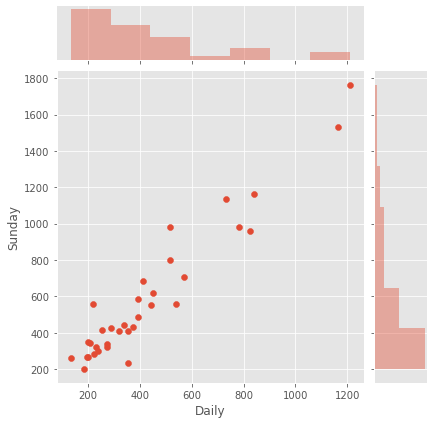

In [57]:
#(a) 일요일 판매 부수 대 주중 판매부수의 산점도를 그려라. 그 플롯은 주중과 일요일 판매부수에 대하여 선형관계를 나타내는가? 이것이 그럴듯한 관계라고 생각하는가?
sns.jointplot(x="Daily", y="Sunday" , data=newspaper)

주중과 일요일의 판매 부수는 선형관계를 나타나는 것처럼 보이는데, 이래야 할 이유가 있는지 잘 모르겠다.

In [58]:
print(get_slope(x=newspaper["Daily"], y=newspaper["Sunday"]))
print(get_intercept(x=newspaper["Daily"], y=newspaper["Sunday"]))

1.3397147576841255
13.835629909636168


In [59]:
#(c) 일요일 판매부수와 주중 판매부수 사이에 유의한 관계가 존재하는가? 통계적 검정에 의하여 당신의 답을 정당화하여라. 당신이 검정하고 있는 가설과 그의 결론이 무엇인지를 나타내어라
get_simple_linear_regression(x=newspaper["Daily"], y=newspaper["Sunday"], alpha=0.95)

slope :  1.3397147576841255
intercept :  13.835629909636168
std_err_of_intercept :  35.80400579072759
std_err_of_slope :  0.07075395080745958
t_stat_of_slope :  18.934840279518067
t_stat_of_intercept :  0.38642687051568064
Hypothesis test of slope :  True
Hypothesis test of intercept :  False
R score :  0.9974393652996041


일요일 판매부수와 주중 판매부수 사이에는 유의한 관계가 존재한다.
단순선형회귀 모델에서 계수 중 하나에 해당하는 기울기(slope)를 최소 자승법을 이용하여 구했고, 
계산 결과 기울기는 1.34, 표준오차는 0.07이었다. 기울기와 표준오차를 이용해 t-test를 실시하면
t statistics는 18.93 이며 이는 95% 신뢰 구간에서 양측 가설 검정 시, 기울기=0이라는 귀무 가설을 기각할 수 있는 범위에 해당하므로,
일요일 판매 부수와 주중 판매 부수 사이에는 유의한 관계가 존재한다라는 결론을 내릴 수 있다.

(e) 일요일 판매부수의 변이 중 주중 판매 부수에 의하여 설명되는 비율은 얼마 인가?
R score 계산 결과 99.7% 이다.

In [99]:
get_SSE(y, y_hat)

392285.5459564663

In [102]:
std_err_of_predicted_value

12159.535369773721

In [101]:
#(f) 주중 판매부수가 500,000일 때, 일요일 판매부수의 평균에 대한 신뢰구간을 구하여라(95% 신뢰수준 하에서)
slope = get_slope(newspaper["Daily"], newspaper["Sunday"])
intercept = get_intercept(newspaper["Daily"], newspaper["Sunday"])
given_x = 500
predicted_value = get_predicted_value(slope=slope, intercept=intercept, given_x=given_x)
y_hat = get_y_hat(slope=slope, intercept=intercept, x=newspaper["Daily"])
std_err_of_predicted_value = get_std_err_of_predicted_value(SSE=get_SSE(newspaper["Sunday"], y_hat), x=newspaper["Daily"], given_x=given_x)
get_confidence_interval_of_predicted_values(predicted_value=predicted_value, std_err_of_predicted_value=std_err_of_predicted_value, x=newspaper["Daily"])

12159.535369773721
683.6930087516989
(-2.036933343460101, 2.036933343460101)


(-24084.47002692284, 25451.85604442624)

In [104]:
model = smf.ols(formula="Sunday ~ Daily",data=newspaper)

In [105]:
result = model.fit()

In [112]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           6.02e-19
Time:                        20:42:43   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
Daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#(g) 일요일판을 고려하고 있는 어떤 신문의 주중판매부수가 500,000 이라고 하자. 이 신문의 예측된 일요일 판매부수에 대하여 구간 추정치를 제시하여라.